# Data Exploration Notebook

This notebook explores the raw data from our LLM-based social network simulation.

In [1]:
import json
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('seaborn')

## Load Data

In [19]:
with open('../data/simulation_results_20240905_230505/network_structure.json', 'r') as f:
    network_data = json.load(f)

with open('../data/simulation_results_20240905_230505/agent_data.json', 'r') as f:
    agent_data = json.load(f)

print(f"Number of agents: {len(agent_data)}")
print(f"Number of connections: {len(network_data['edges'])}")

Number of agents: 10
Number of connections: 68


## Explore Network Structure

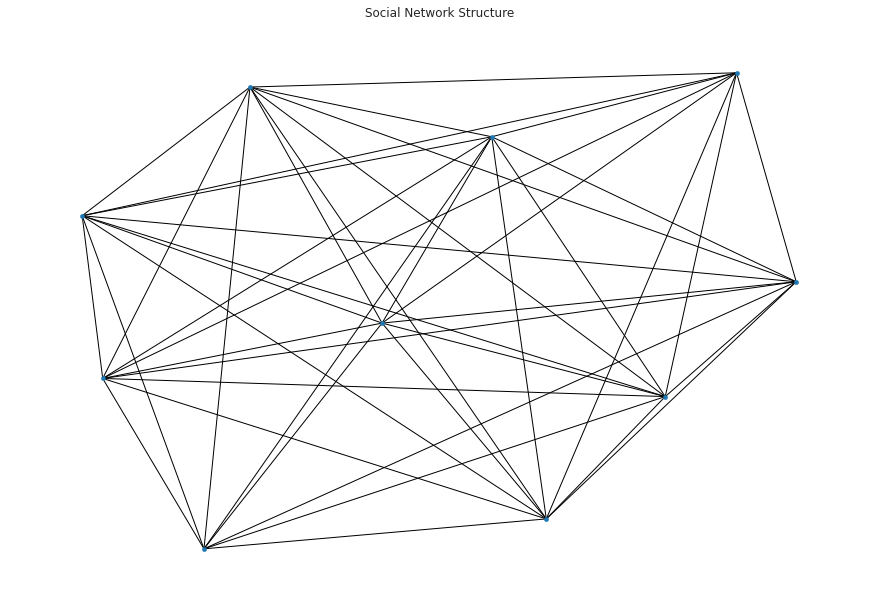

Network density: 0.9778
Average clustering coefficient: 0.9778


In [20]:
G = nx.Graph()
G.add_nodes_from(network_data['nodes'])
G.add_edges_from(network_data['edges'])

plt.figure(figsize=(12, 8))
nx.draw(G, node_size=20, with_labels=False)
plt.title("Social Network Structure")
plt.show()

print(f"Network density: {nx.density(G):.4f}")
print(f"Average clustering coefficient: {nx.average_clustering(G):.4f}")

## Analyze Agent Types

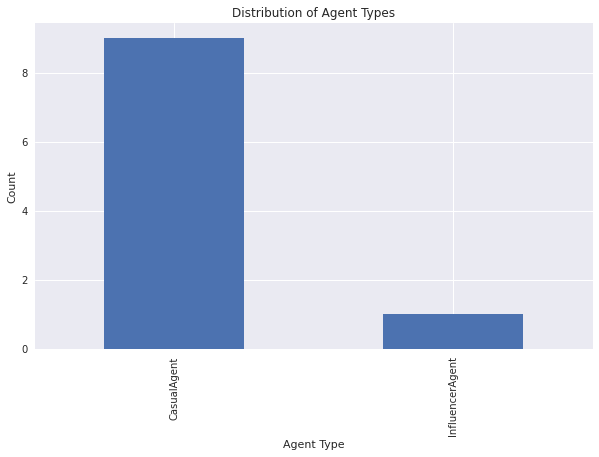

In [21]:
agent_types = [data['type'] for data in agent_data.values()]
type_counts = pd.Series(agent_types).value_counts()

plt.figure(figsize=(10, 6))
type_counts.plot(kind='bar')
plt.title("Distribution of Agent Types")
plt.xlabel("Agent Type")
plt.ylabel("Count")
plt.show()

## Explore Messages

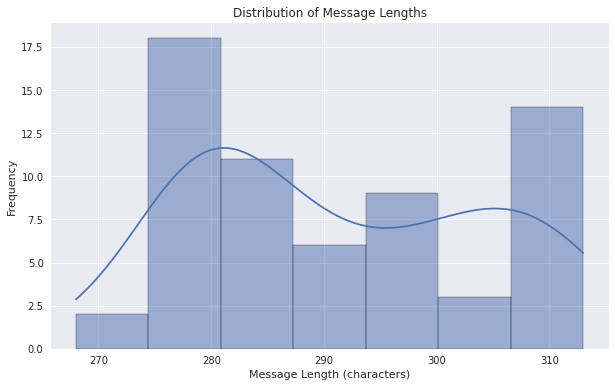

Total messages: 63
Average message length: 291.32 characters


In [22]:
all_messages = [msg for data in agent_data.values() for msg in data['messages']]
message_lengths = [len(msg) for msg in all_messages]

plt.figure(figsize=(10, 6))
sns.histplot(message_lengths, kde=True)
plt.title("Distribution of Message Lengths")
plt.xlabel("Message Length (characters)")
plt.ylabel("Frequency")
plt.show()

print(f"Total messages: {len(all_messages)}")
print(f"Average message length: {sum(message_lengths) / len(message_lengths):.2f} characters")

## Analyze Agent Personalities

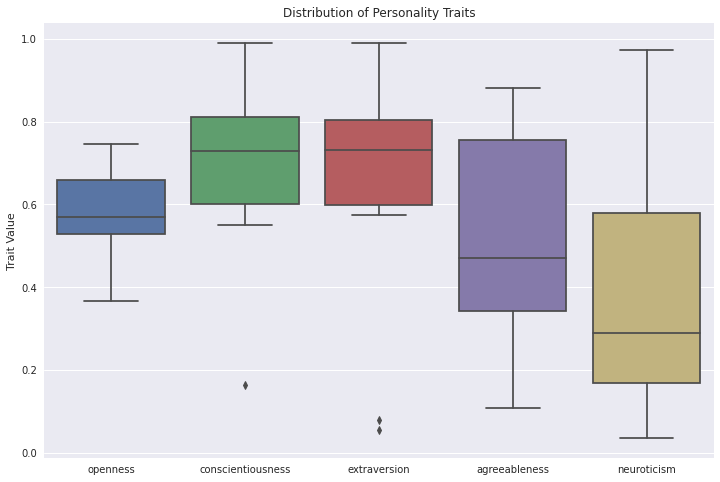

        openness  conscientiousness  extraversion  agreeableness  neuroticism
count  10.000000          10.000000     10.000000      10.000000    10.000000
mean    0.569261           0.696478      0.627229       0.509833     0.409221
std     0.127309           0.233699      0.314955       0.277044     0.325534
min     0.366343           0.163420      0.054784       0.108003     0.035932
25%     0.528520           0.600965      0.598625       0.341750     0.167793
50%     0.568792           0.728397      0.732669       0.471854     0.288896
75%     0.658225           0.811688      0.803928       0.755262     0.579375
max     0.744937           0.988944      0.990659       0.880905     0.973551


In [23]:
personalities = pd.DataFrame([data['personality'] for data in agent_data.values()])

plt.figure(figsize=(12, 8))
sns.boxplot(data=personalities)
plt.title("Distribution of Personality Traits")
plt.ylabel("Trait Value")
plt.show()

print(personalities.describe())